In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
regressor.score(X_test,y_test)


0.9347068473282341

In [13]:
y_pred = regressor.predict(X_test)
y_test = y_test.to_numpy()
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [15]:
y_pred

array([103015.2 , 132582.28, 132447.74,  71976.1 , 178537.48, 116161.24,
        67851.69,  98791.73, 113969.44, 167921.07])

In [17]:
regressor.score(X_test, y_pred)

1.0

Visualizing the data for training set

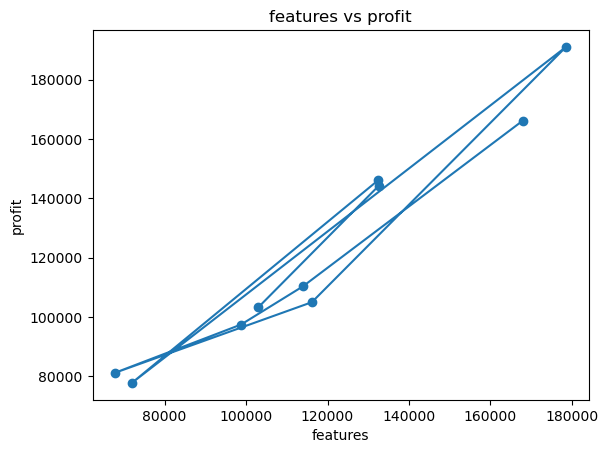

In [26]:
plt.scatter(y_pred, y_test)
plt.plot(y_pred, y_test)
plt.xlabel('features')
plt.ylabel('profit')
plt.title('features vs profit')
plt.show()